<a href="https://colab.research.google.com/github/kandelprakashchandra/vis/blob/main/PS2_Political_and_Socio_Economic_Impact_of_2009_Global_Recession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PS2_Political and Socio-Economic Impact of 2009 Global Recession.**

**Prakash Kandel**

**Course: 56:834:653:01 DATA VISUALIZATION**

**Spring 2023**

**Instructor: Adam Okulicz-Kozaryn**

**The Impact of 2009 Recession across Countries around the World Based on their Socio-Economic Statuses**



As we all know that 2009 Global Recession that began in the United States in 2008 had global ramifications in very sphere of life. As per IMF (International Monetary Fund), the recessions are responsible for slowing down economic activities leading to increase in poverty as people are led off. Recessions are expected to change economic outlook and overall sphere of human life. Therefore, in this light, this piece of research will try to answer the puzzles using following research questions:

1. Has there any been any significant change in GDP revenue  after the recession hit? Has it varied across countries cateogorized by income categories and regions?

2. Have people become more or less happy across the countries, regions, and income levels after the incidence of recession ?

3. Have the world governance indicators been affected  by the recession by income categories and regions?

4. Has there any been significant any change in world inequality after the recession hit? Has it varied across countires cateogorized by income categories and regions?

Sources:

<a href="https://www.imf.org/en/Publications/fandd/issues/Series/Back-to-Basics/Recession"> Recession (IMF)</a>


WORLD GOVERNANCE INDICATORS (WGI):

As per The World Bank, governance consists "the traditions and institutions by which authority in a country is exercised.  This includes the process by which governments are selected, monitored and replaced; the capacity of the government to effectively formulate and implement sound policies; and the respect of citizens and the state for the institutions that govern economic and social interactions among them."


The World Bank hase been producing world governance reports annually since 1996 to gauge the governance situations in almost all the countires across the globe. It condsiders six composite indicators related to governance which are as follows:
1. Voice and Accountability,
2. Political Stability and Absence of Violence/Terrorism, 
3. Government Effectiveness,
4. Regulatory Quality,
5. Rule of Law, and 
6. Control of Corruption

The data are based on "the views of a large number of enterprise, citizen and expert survey respondents in industrial and developing countries".

Sources:

<a href="https://info.worldbank.org/governance/wgi/"> Worldwide Governance Indicators </a>

<a href="https://info.worldbank.org/governance/wgi/pdf/WGI.pdf"> The Worldwide Governance Indicators: Methodology and Analytical Issues  </a>



In [173]:
from statistics import *
import pylab as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
from pandas_datareader import wb
import sys
import os 
import re
import urllib                                                  
import string 
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import json

import numpy as np

import openpyxl
from pathlib import Path

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import requests

import zipfile # for unzipping Zipped Files
from io import BytesIO #Byte IO function to  read the contents of the zip file into memory

import pandas_datareader.data as web

import matplotlib.pyplot as plt

import seaborn as sns

In [174]:
# Extraction of World Governance Indicators directly from the Website

url = "https://info.worldbank.org/governance/wgi/Home/downLoadFile?fileName=wgidataset_stata.zip"
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content)) # for unzipping the zipped STATA File

govindic = pd.read_stata(z.open("wgidataset.dta"))

labels = pd.read_stata(z.open("wgidataset.dta"), iterator=True) #reading labels
labels.variable_labels()

govindic.head()

{'code': 'code',
 'countryname': 'countryname',
 'year': '',
 'vae': 'Voice and Accountability, Estimate',
 'vas': 'Voice and Accountability, Standard Error',
 'van': 'Voice and Accountability, Number of Sources',
 'var': 'Voice and Accountability, Percentile Rank (0-100)',
 'val': 'Voice and Accountability, Percentile Rank of Lower Bound of 90% Confidence Inter',
 'vau': 'Voice and Accountability, Percentile Rank of Upper Bound of 90% Confidence Inter',
 'pve': 'Political Stability and Absence of Violence/Terrorism, Estimate',
 'pvs': 'Political Stability and Absence of Violence/Terrorism, Standard Error',
 'pvn': 'Political Stability and Absence of Violence/Terrorism, Number of Sources',
 'pvr': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank (0-100)',
 'pvl': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank of Lower ',
 'pvu': 'Political Stability and Absence of Violence/Terrorism, Percentile Rank of Upper ',
 'gee': 'Government Effecti

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
govindic.tail(20) # inspecting data to enusre there is no unwanted data at the end

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
4902,ZWE,Zimbabwe,2002,-1.363361,0.156958,11.0,10.945273,5.472637,15.920398,-1.515870,...,10.0,3.482587,0.000000,8.457711,-1.156760,0.189122,6.0,7.407407,0.529101,23.809525
4903,ZWE,Zimbabwe,2003,-1.431192,0.148406,12.0,9.950249,3.980099,12.935324,-1.087581,...,11.0,2.487562,0.000000,8.457711,-1.188868,0.185884,8.0,6.878307,1.058201,21.164021
4904,ZWE,Zimbabwe,2004,-1.553577,0.144486,13.0,6.250000,2.403846,10.096154,-1.204704,...,13.0,2.884615,0.000000,6.730769,-1.253563,0.168878,10.0,8.866995,0.985222,17.733990
4905,ZWE,Zimbabwe,2005,-1.674941,0.139619,14.0,5.288462,1.923077,8.173077,-1.267644,...,14.0,0.478469,0.000000,3.349282,-1.314617,0.165643,11.0,7.317073,0.000000,15.609756
4906,ZWE,Zimbabwe,2006,-1.539244,0.110492,17.0,7.211538,6.730769,8.653846,-0.931996,...,17.0,0.956938,0.000000,3.827751,-1.372949,0.149107,14.0,4.390244,0.487805,10.243902
4907,ZWE,Zimbabwe,2007,-1.571521,0.112105,17.0,7.211538,4.326923,8.653846,-1.110345,...,17.0,1.435407,0.000000,1.913876,-1.404758,0.155571,14.0,2.912621,0.000000,10.679611
4908,ZWE,Zimbabwe,2008,-1.549031,0.109917,17.0,7.692307,4.326923,9.615385,-1.212338,...,17.0,0.961538,0.000000,2.884615,-1.348838,0.152072,14.0,3.883495,0.970874,12.621359
4909,ZWE,Zimbabwe,2009,-1.539210,0.111639,17.0,7.582938,3.791469,9.952606,-1.167181,...,17.0,0.947867,0.000000,1.421801,-1.357875,0.154961,14.0,3.349282,0.478469,11.961722
4910,ZWE,Zimbabwe,2010,-1.475182,0.110218,17.0,8.056872,5.687204,12.796208,-1.104014,...,17.0,0.947867,0.000000,2.369668,-1.373287,0.150240,15.0,2.857143,0.952381,12.380953
4911,ZWE,Zimbabwe,2011,-1.463763,0.110784,18.0,7.981221,5.164319,12.676056,-0.945329,...,17.0,0.938967,0.000000,1.877934,-1.425627,0.149206,15.0,2.369668,0.000000,10.900474


In [176]:
govindic.columns # inspecting the var names

Index(['code', 'countryname', 'year', 'vae', 'vas', 'van', 'var', 'val', 'vau',
       'pve', 'pvs', 'pvn', 'pvr', 'pvl', 'pvu', 'gee', 'ges', 'gen', 'ger',
       'gel', 'geu', 'rqe', 'rqs', 'rqn', 'rqr', 'rql', 'rqu', 'rle', 'rls',
       'rln', 'rlr', 'rll', 'rlu', 'cce', 'ccs', 'ccn', 'ccr', 'ccl', 'ccu'],
      dtype='object')

In [177]:
govindic.info() #data types of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 4921
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         4922 non-null   object 
 1   countryname  4922 non-null   object 
 2   year         4922 non-null   int16  
 3   vae          4768 non-null   float32
 4   vas          4768 non-null   float32
 5   van          4768 non-null   float32
 6   var          4768 non-null   float32
 7   val          4768 non-null   float32
 8   vau          4768 non-null   float32
 9   pve          4753 non-null   float32
 10  pvs          4753 non-null   float32
 11  pvn          4753 non-null   float32
 12  pvr          4753 non-null   float32
 13  pvl          4753 non-null   float32
 14  pvu          4753 non-null   float32
 15  gee          4679 non-null   float32
 16  ges          4679 non-null   float32
 17  gen          4679 non-null   float32
 18  ger          4679 non-null   float32
 19  gel   

In [178]:
govindic.describe() # descriptive statistics of the variables

,year,vae,vas,van,var,val,vau,pve,pvs,pvn,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
count,4922.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4753.000000,4753.000000,4753.000000,...,4793.000000,4793.000000,4793.000000,4793.000000,4.703000e+03,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,2009.739130,0.000000,0.174118,9.401846,50.016102,41.539654,57.810894,0.000000,0.284441,5.425626,...,9.409347,50.051483,40.050411,59.126564,-6.488960e-09,0.210343,7.998937,50.051537,39.611240,59.533039
std,7.066972,0.997690,0.080265,4.448198,29.027012,26.720179,30.591827,0.997683,0.082418,2.283097,...,4.405445,29.058060,28.514313,28.658710,9.976578e-01,0.101687,4.155859,29.066736,29.945717,27.025034
min,1996.000000,-2.313395,0.103448,1.000000,0.000000,0.000000,0.966184,-3.312951,0.192247,1.000000,...,1.000000,0.000000,0.000000,0.000000,-1.916457e+00,0.114779,1.000000,0.000000,0.000000,1.904762
25%,2004.000000,-0.820271,0.127144,6.000000,24.882629,16.826923,30.516432,-0.643627,0.231508,4.000000,...,6.000000,24.882629,13.942307,36.492889,-7.733018e-01,0.147936,4.000000,24.879215,12.500000,38.442593
50%,2010.000000,0.052558,0.144501,10.000000,50.000000,40.384617,57.211540,0.110401,0.254975,6.000000,...,10.000000,50.000000,37.980770,58.373207,-2.253539e-01,0.174068,8.000000,50.000000,34.615383,60.189575
75%,2016.000000,0.911884,0.203310,13.000000,75.119125,64.532021,88.888885,0.853993,0.316001,7.000000,...,13.000000,75.961540,62.085308,86.538460,7.416013e-01,0.232341,11.000000,75.480766,64.903847,83.023758
max,2021.000000,1.800992,0.893413,20.000000,100.000000,97.584541,100.000000,1.965062,0.733391,10.000000,...,18.000000,100.000000,97.115387,100.000000,2.459118e+00,0.991055,16.000000,100.000000,97.630333,100.000000


In [179]:
columns_to_keep = ['code', 'countryname', 'year', 'vae', 'pve', 'gee', 'rqe', 'rle', 'cce'] #keeping only the required variables
govindic = govindic[columns_to_keep]

govindic.head()

,code,countryname,year,vae,pve,gee,rqe,rle,cce
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Meaningful labels to world governance indicators

new_labels = {'countryname': 'country', 'code':'iso3code', 'vae':'voacest', 'pve' : 'polstabest', 'gee' : 'goveffest', 'rqe':'quaregest', 'rle' : 'ruloflawest', 'cce': 'corcontest'}
govindic= govindic.rename(columns=new_labels)

govindic.head()

Text(0.5, 1.0, 'World Governance Indicators for Countries in South Asia ')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Indicator Value')

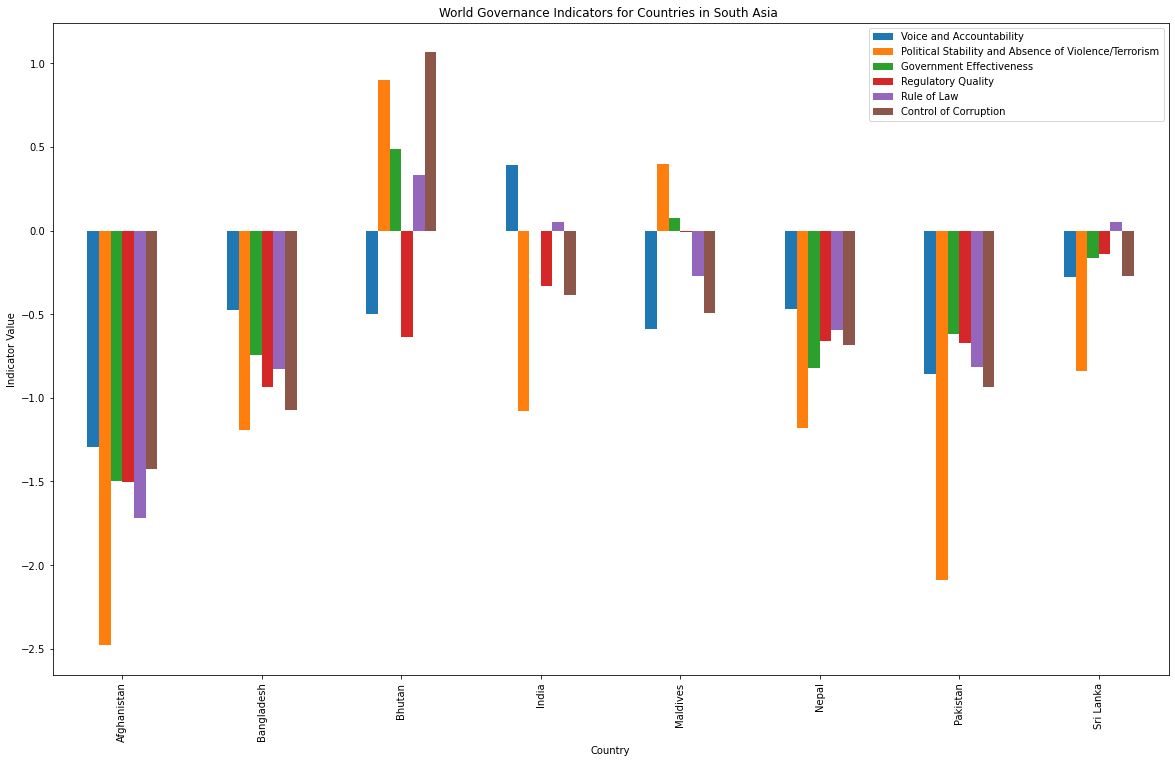

In [181]:
# Collapsing of data before creating graphs
collapsedgov = govindic.groupby(['country']).agg({'voacest': 'mean', 'polstabest': 'mean', 'goveffest' : 'mean', 'quaregest': 'mean', 'ruloflawest': 'mean', 'corcontest':	'mean'})

# Resetting the index so that the country does not become index and is ineligible for plotting grapgh
collapsedgov = collapsedgov.reset_index()

# Selecting the countries of South Asia to create the graph
selected_countries = ['Afghanistan', 'Nepal', 'Sri Lanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
collapsedgov = collapsedgov[collapsedgov['country'].isin(selected_countries)]

collapsedgov  = collapsedgov.set_index('country')

# Plotting the mean of each indicator for each country using a bar chart
collapsedgov.plot(kind='bar', figsize=(20, 12), legend=True)

# Adding a title and labels for the x and y axes
plt.title('World Governance Indicators for Countries in South Asia ')
plt.xlabel('Country')
plt.ylabel('Indicator Value')

# Changing the legend labels
plt.legend(['Voice and Accountability', "Political Stability and Absence of Violence/Terrorism", 'Government Effectiveness', 'Regulatory Quality', 'Rule of Law', "Control of Corruption"])

# Displaying the plot
plt.show()

From the above graph, it appears that almost all countries in South Asia do not perform well on almost all indicators. The governance problem is the most stark in Afghanistan followed by Pakistan and Bangladesh. However, Bhutan has comparatively more impressive record on most of the indicators than other countries.

In [182]:
# Get the unique values of the 'country' column
unique_values = govindic['country'].unique()

# Print the unique values
print(unique_values)

['Aruba' 'Andorra' 'Afghanistan' 'Angola' 'Anguilla' 'Albania'
 'Netherlands Antilles (former)' 'United Arab Emirates' 'Argentina'
 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Chile' 'China' "Côte d'Ivoire" 'Cameroon' 'Congo, Rep.' 'Cook Islands'
 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Cuba' 'Cayman Islands'
 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti' 'Dominica' 'Denmark'
 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt, Arab Rep.' 'Eritrea'
 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Fed. Sts.' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana'
 'Guinea' 'Gambia, The' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece'
 'Grenada' 'Greenland' 'Guatemala' '

COUNTRY CODES FOR MERGER PURPOSE

Source: <a href="https://www.kaggle.com/datasets/juanumusic/countries-iso-codes?resource=download"> Country Codes </a>

In [183]:
# Importing of country codes from GITHUB
url = "https://raw.githubusercontent.com/kandelprakashchandra/vis/main/country_codes.csv"
countcodes = pd.read_csv(url)

countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [184]:
# Drop column 'ISO 3166-2'
countcodes = countcodes.drop(columns=['ISO 3166-2'], axis=1)
countcodes.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [185]:
#Rename the country var for making merger smooth
countcodes = countcodes.rename(columns={'English short name lower case': 'country', 'Alpha-2 code': 'iso2code', 'Alpha-3 code': 'iso3code','Numeric code' : 'numcode' }) #ren var

countcodes.dtypes

countcodes.head()

country     object
iso2code    object
iso3code    object
numcode      int64
dtype: object

,country,iso2code,iso3code,numcode
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [186]:
unique_values = govindic['country'].unique()

unique_values

array(['Aruba', 'Andorra', 'Afghanistan', 'Angola', 'Anguilla', 'Albania',
       'Netherlands Antilles (former)', 'United Arab Emirates',
       'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Rep.', 'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cayman Islands', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fe

**Merging WORLD GOVERNANCE INDICATORS DATASET with COUNTRY CODE DATASET**

In [187]:
codegovmerged =pd.merge(countcodes, govindic, how='outer',  on=["iso3code", "country"], indicator=True) # merging on a common id variable 'code' and with the dataframe for country codes on the left
# Here the "inner" parameter was used to get numeric codes for countries in the dataset with the World Governace Indicators
codegovmerged.head(10)
codegovmerged.tail(10)

,country,iso2code,iso3code,numcode,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AF,AFG,4.0,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,both
1,Afghanistan,AF,AFG,4.0,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,both
2,Afghanistan,AF,AFG,4.0,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,both
3,Afghanistan,AF,AFG,4.0,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,both
4,Afghanistan,AF,AFG,4.0,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,both
5,Afghanistan,AF,AFG,4.0,2004.0,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647,both
6,Afghanistan,AF,AFG,4.0,2005.0,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252,both
7,Afghanistan,AF,AFG,4.0,2006.0,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
8,Afghanistan,AF,AFG,4.0,2007.0,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
9,Afghanistan,AF,AFG,4.0,2008.0,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both


,country,iso2code,iso3code,numcode,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4983,"Congo, Dem. Rep.",NaN,ZAR,NaN,2012.0,-1.481082,-2.085893,-1.645317,-1.479630,-1.662914,-1.329711,right_only
4984,"Congo, Dem. Rep.",NaN,ZAR,NaN,2013.0,-1.458554,-2.192191,-1.467610,-1.260716,-1.584832,-1.338081,right_only
4985,"Congo, Dem. Rep.",NaN,ZAR,NaN,2014.0,-1.286946,-2.167921,-1.565616,-1.373450,-1.462761,-1.320771,right_only
4986,"Congo, Dem. Rep.",NaN,ZAR,NaN,2015.0,-1.304218,-2.150854,-1.602174,-1.336872,-1.590687,-1.291259,right_only
4987,"Congo, Dem. Rep.",NaN,ZAR,NaN,2016.0,-1.412191,-2.234622,-1.521073,-1.311466,-1.640507,-1.348747,right_only
4988,"Congo, Dem. Rep.",NaN,ZAR,NaN,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4989,"Congo, Dem. Rep.",NaN,ZAR,NaN,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4990,"Congo, Dem. Rep.",NaN,ZAR,NaN,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4991,"Congo, Dem. Rep.",NaN,ZAR,NaN,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only
4992,"Congo, Dem. Rep.",NaN,ZAR,NaN,2021.0,-1.198189,-1.614667,-1.718878,-1.422889,-1.703835,-1.552154,right_only


In [188]:
unique_values = codegovmerged['_merge'].unique() # inspecting whether the merge was smooth 

print(unique_values)

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']


In [189]:
# Show rows with `right only` values
right_only = codegovmerged[codegovmerged['_merge'] == 'right_only']

right_only

,country,iso2code,iso3code,numcode,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4096,Andorra,NaN,ADO,NaN,1996.0,1.563217,1.169522,1.414038,1.266440,1.158363,1.318143,right_only
4097,Andorra,NaN,ADO,NaN,1998.0,1.528759,1.182875,1.403356,1.245862,1.177254,1.334759,right_only
4098,Andorra,NaN,ADO,NaN,2000.0,1.535655,1.166981,1.380487,1.223144,1.286165,1.313404,right_only
4099,Andorra,NaN,ADO,NaN,2002.0,1.437128,1.282767,1.367723,1.422463,1.223841,1.310744,right_only
4100,Andorra,NaN,ADO,NaN,2003.0,1.422262,1.465131,1.348457,1.414684,1.055983,1.332790,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...
4988,"Congo, Dem. Rep.",NaN,ZAR,NaN,2017.0,-1.465298,-2.302249,-1.634874,-1.467066,-1.705662,-1.428617,right_only
4989,"Congo, Dem. Rep.",NaN,ZAR,NaN,2018.0,-1.507611,-2.105781,-1.539629,-1.465463,-1.794962,-1.500561,right_only
4990,"Congo, Dem. Rep.",NaN,ZAR,NaN,2019.0,-1.313973,-1.593899,-1.618209,-1.499778,-1.798251,-1.539866,right_only
4991,"Congo, Dem. Rep.",NaN,ZAR,NaN,2020.0,-1.265429,-1.742298,-1.714081,-1.491252,-1.802082,-1.574677,right_only


In [190]:
# Show rows with `left only` values
left_only = codegovmerged[codegovmerged['_merge'] == 'left_only']

print(left_only)

                      country iso2code iso3code  numcode  year  voacest  \
23              Åland Islands       AX      ALA    248.0   NaN      NaN   
93                    Andorra       AD      AND     20.0   NaN      NaN   
140                Antarctica       AQ      ATA     10.0   NaN      NaN   
302                   Bahamas       BS      BHS     44.0   NaN      NaN   
579             Bouvet Island       BV      BVT     74.0   NaN      NaN   
...                       ...      ...      ...      ...   ...      ...   
4045  Virgin Islands, British       VG      VGB     92.0   NaN      NaN   
4046     Virgin Islands, U.S.       VI      VIR    850.0   NaN      NaN   
4047        Wallis and Futuna       WF      WLF    876.0   NaN      NaN   
4048           Western Sahara       EH      ESH    732.0   NaN      NaN   
4049                    Yemen       YE      YEM    887.0   NaN      NaN   

      polstabest  goveffest  quaregest  ruloflawest  corcontest     _merge  
23           NaN      

In [191]:
# Check for missing values in merged dataframe
print("\nMissing values in merged df:")
print(codegovmerged.isna().sum())


Missing values in merged df:
country          0
iso2code       920
iso3code         0
numcode        897
year            71
voacest        225
polstabest     240
goveffest      314
quaregest      312
ruloflawest    200
corcontest     290
_merge           0
dtype: int64


In [192]:
unique_values = codegovmerged['country'].unique() # inspecting whether the merge was smooth by considering countries

print(unique_values)

['Afghanistan' 'Åland Islands' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos (Keeling) Islands' 'Colombia' 'Comoros' 'Congo'
 'Congo, the Democratic Republic of the' 'Cook Islands' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'French

In [193]:
# Making the names of the countries and other entities uniform after merger using "replace" command
codegovmerged = codegovmerged.replace({'country' : { 'Bahamas, The': 'Bahamas', 'Egypt, Arab Rep.': 'Egypt',
                                   'Brunei Darussalam': 'Brunei','Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran','Korea, Rep.':'South Korea', 'Kyrgyz Republic': 'Kyrgyzstan',
                                   'Lao PDR': 'Laos', 'Korea, Dem. Rep.': 'North Korea', 'Russian Federation': 'Russia', 'Slovak Republic':'Slovakia', 'Türkiye':'Turkey',
                                    'Taiwan, China': 'Taiwan', 'Tanzania, United Republic of':'Tanzania', 'United States':'United States Of America', 'Venezuela, RB': 'Venezuela',
                                     'Yemen, Rep.': 'Yemen', 'Virgin Islands, U.S.': 'Virgin Islands (U.S.)',  'Congo, the Democratic Republic of the': 'Congo, Dem. Rep.' }})

In [194]:
# Reordering the variables
codegovmerged = codegovmerged[['numcode', 'iso2code', 'iso3code', 'country', 'year', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

# renaming 'country' variable
codegovmerged = codegovmerged.rename(columns={'country_y':'country'})

codegovmerged.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [195]:
# Inspect the merged dataframe
#print("\nMerged codegovmerged shape:", codegovmerged.shape)
#print("Merged codegovmerged columns:", codegovmerged.columns)

Text(0.5, 1.0, 'Control of Corruption Perception in South Asian Countries')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Corruption Index ')

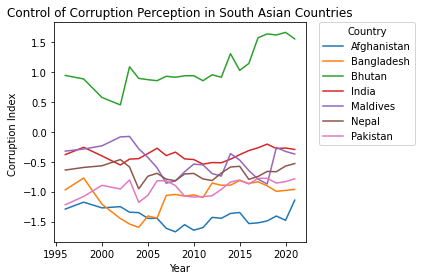

In [196]:
# Testing the trend of corruption in South Asian countries over the given years
countries = ['Afghanistan', 'Nepal', 'Srilanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
selected_count =codegovmerged[codegovmerged['country'].isin(countries)]

# Creating a line chart using seaborn's lineplot function for Corruption Control Indicator
sns.lineplot(x='year', y='corcontest', hue='country', data=selected_count)

# Adding a title and labels to the x and y axes
plt.title('Control of Corruption Perception in South Asian Countries')
plt.xlabel('Year')
plt.ylabel('Corruption Index ')

# Managing the legend
legend = plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Adjusting the size of the plot to make room for the legend
plt.tight_layout()

**INTERPRETATION:**

From the chart, it appears that in the period between 1995 to 2021, the public perception of rampant corruption was the highest in Afghnistan at -1.7 in 1996, and the condition has not improved but worsened.Nevertheless, Bhutan is the country where people continue to experience the lowest level of corruption, and the perception has consistently improved, starting at 1.0 and ending in 1.5. For most the countries, there seems to be no positive change in transparency and accontability, and for some, the situation seems to have deteriorated.


The range of indicator is between -2.5 to +2.5, where -2.5 represents the highest level of corruption preception and +2.5 the lowest level of corruption perception. "Control of corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and
grand forms of corruption, as well as "capture" of the state by elites and private interests."

Source: <a href="https://info.worldbank.org/governance/wgi/Home/Documents"> World Governance Indicators </a>

TOTAL REVENUE IN PERCENT OF GDP

Source:

<a href="https://data.imf.org/?sk=77413f1d-1525-450a-a23a-47aeed40fe78"> IMF World Revenue Longitudinal Data(WoRLD) </a>

Note: This dataset is related to economic variable.


In [197]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1yucHgUR5TXedba87tMBn0eJw993-xDrb", "worldrevimf.dta")

revenueimf = pd.read_stata('worldrevimf.dta')

revenueimf.head()


('worldrevimf.dta', <http.client.HTTPMessage at 0x7f1df88c06d0>)

,ccode,year,var,value,value2,latestyear
0,512.0,1990,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
1,512.0,1991,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
2,512.0,1992,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
3,512.0,1993,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN
4,512.0,1994,Corporate Income Tax Revenue as a % of GDP,NaN,,NaN


In [198]:
revenueimf = revenueimf[revenueimf ['var'].isin(['Total Revenue as a % of GDP'])] # Here, I only kept the variable value of interest which is "Total Revenue as a % of GDP"


revenueimf = revenueimf.drop(['value2', 'latestyear'], axis=1) # dropped variables that do not have data or are not required

revenueimf. head()

,ccode,year,var,value
69190,512.0,1990,Total Revenue as a % of GDP,NaN
69191,512.0,1991,Total Revenue as a % of GDP,NaN
69192,512.0,1992,Total Revenue as a % of GDP,NaN
69193,512.0,1993,Total Revenue as a % of GDP,NaN
69194,512.0,1994,Total Revenue as a % of GDP,NaN


In [199]:
revenueimf = revenueimf.rename(columns={'ccode':'weocode','value':'totrevgdp'}) # renaming a variable that has values for total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

,weocode,year,var,totrevgdp
69190,512.0,1990,Total Revenue as a % of GDP,NaN
69191,512.0,1991,Total Revenue as a % of GDP,NaN
69192,512.0,1992,Total Revenue as a % of GDP,NaN
69193,512.0,1993,Total Revenue as a % of GDP,NaN
69194,512.0,1994,Total Revenue as a % of GDP,NaN


weocode      float64
year           int16
var           object
totrevgdp    float64
dtype: object

In [200]:
# Get the unique values of the variable 'year' to see the range and to limit the number of years
unique_values =revenueimf['year'].unique()

# Print the unique values
unique_values

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int16)

In [201]:
revenueimf = revenueimf[revenueimf['year']>1999] #selected years from 2000 onwards

revenueimf = revenueimf.drop(['var'], axis=1) # dropped the variable after taking it as reference to rename var representing the total revenue as a percentage of GDP

revenueimf.head()
revenueimf.dtypes

,weocode,year,totrevgdp
69200,512.0,2000,NaN
69201,512.0,2001,NaN
69202,512.0,2002,6.844626
69203,512.0,2003,9.825829
69204,512.0,2004,12.675875


weocode      float64
year           int16
totrevgdp    float64
dtype: object

In [202]:
# Get the unique values of the 'wecode' column
unique_values = revenueimf['weocode'].unique()

# Print the unique values
print(unique_values)

[512. 914. 612. 614. 312. 311. 213. 911. 314. 193. 122. 912. 313. 419.
 513. 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748.
 618. 624. 522. 622. 156. 626. 628. 228. 924. 233. 632. 636. 634. 238.
 960. 423. 935. 662. 128. 611. 321. 243. 248. 469. 253. 642. 643. 939.
 734. 644.  nan 819. 172. 132. 646. 648. 915. 134. 652. 174. 328. 258.
 656. 654. 336. 263. 268. 532. 944. 176. 534. 536. 429. 433. 178. 436.
 136. 343. 158. 439. 916. 664. 826. 542. 967. 443. 917. 544. 941. 446.
 666. 668. 672. 946. 137. 546. 674. 676. 548. 556. 678. 181. 867. 682.
 684. 273. 868. 921. 948. 943. 351. 686. 688. 518. 728. 836. 558. 138.
 196. 278. 692. 694. 962. 142. 449. 564. 565. 283. 853. 288. 293. 566.
 964. 182. 453. 968. 922. 714. 862. 135. 456. 722. 942. 718. 724. 576.
 936. 961. 813. 726. 199. 733. 184. 524. 361. 362. 364. 732. 366. 144.
 146. 463. 716. 528. 923. 738. 578. 537. 742. 866. 369. 744. 186. 925.
 869. 746. 926. 466. 112. 111. 298. 927. 846. 299. 582. 487. 474. 754.
 698.]

In [203]:
non_numeric_rows = revenueimf[revenueimf['weocode'].isnull()] # I used this code to examine the country code with the value 'NaN", and it appears that the code representing a certian county is missing.

non_numeric_rows.head(25) # The country code "NaN" does not represent any country; therefore, it will be dropped after inspection.

,weocode,year,totrevgdp
71050,NaN,2000,41.822678
71051,NaN,2001,41.250065
71052,NaN,2002,41.264835
71053,NaN,2003,41.154495
71054,NaN,2004,41.134060
71055,NaN,2005,41.727787
71056,NaN,2006,41.824867
71057,NaN,2007,41.984627
71058,NaN,2008,41.669476
71059,NaN,2009,41.550579


In [204]:
revenueimf = revenueimf[revenueimf.weocode.notnull()] # The country code which was missing was dropped.

revenueimf['weocode'].isna().sum() # to check if there was any missing value remanining for the country code

0

In [205]:
revenueimf['weocode'] = revenueimf['weocode'].astype(int) # The country codes had to be converted to integer form as they are not identified by decimals.

revenueimf.head()

,weocode,year,totrevgdp
69200,512,2000,NaN
69201,512,2001,NaN
69202,512,2002,6.844626
69203,512,2003,9.825829
69204,512,2004,12.675875


In [206]:
# collapsing the variables for means using 'code' and 'total revenue' vars to aggregate
collapseimf= revenueimf.groupby(['weocode']).agg({'totrevgdp': 'sum'})

collapseimf.tail()

,totrevgdp
weocode,
962,645.829033
963,938.589279
964,834.374149
967,480.206612
968,643.321339


MERGE OF COUNTRY CODES IN IMF TOTAL REVENUE DATA WITH DATASET WITH ISO CODES FOR FURTHER COMPREHENSIVE MERGING PURPOSE

Source for Both WEO and WITS Country Codes: <a href="https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/WEOOct2019all.xls"> IMF Country Codes</a>

Note: The IMF revenue dataset has WEO (World Economic Outlook) dataset but no WITS (Wellsite Information Transfer Specification) codes, that is, ISO codes. Therefore, dataset that has both WEO and WITS codes has been used for crosswalk.

In [207]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=1BGwsefB4KZlMnrrIzjKJ3iAxjHJOBdPx&export=download", "imfcountrycodes.xlsx")

imfcountcodes = pd.read_excel('imfcountrycodes.xlsx')

imfcountcodes.head()

imfcountcodes.shape

('imfcountrycodes.xlsx', <http.client.HTTPMessage at 0x7f1df94aa3d0>)

,WEO Country Code,ISO,Country
0,512,AFG,Afghanistan
1,512,AFG,Afghanistan
2,512,AFG,Afghanistan
3,512,AFG,Afghanistan
4,512,AFG,Afghanistan


(8730, 3)

In [208]:
# Renaming the variabels to make them consistent throughout all datasets

imfcountcodes.rename(columns={'WEO Country Code':'weocode','ISO':'iso3code', 'Country' : 'country' }, inplace=True)

imfcountcodes.head()

,weocode,iso3code,country
0,512,AFG,Afghanistan
1,512,AFG,Afghanistan
2,512,AFG,Afghanistan
3,512,AFG,Afghanistan
4,512,AFG,Afghanistan


In [209]:
# collapsing the variables for means using 'code' and 'country' vars to aggregate
imfcountcodes = imfcountcodes.groupby(['iso3code', 'country']).agg({'weocode': 'mean'})

imfcountcodes. head() 
imfcountcodes.tail()

imfcountcodes.shape # There are 194 countries in this dataset.

,,weocode
iso3code,country,
ABW,Aruba,314.0
AFG,Afghanistan,512.0
AGO,Angola,614.0
ALB,Albania,914.0
ARE,United Arab Emirates,466.0


,,weocode
iso3code,country,
WSM,Samoa,862.0
YEM,Yemen,474.0
ZAF,South Africa,199.0
ZMB,Zambia,754.0
ZWE,Zimbabwe,698.0


(194, 1)

In [210]:
imfcountcodes['weocode'] = imfcountcodes['weocode'].astype(int) # The 	WEO Country Code codes had to be converted to integer form as they are not identified by decimals.

imfcountcodes.head()

,,weocode
iso3code,country,
ABW,Aruba,314
AFG,Afghanistan,512
AGO,Angola,614
ALB,Albania,914
ARE,United Arab Emirates,466


MERGING BETWEEN 'WORLD GOVERNANCE DATASET' AND 'IMF COUNTRY CODE' DATASETS

In [211]:
mergedimf =pd.merge(codegovmerged, imfcountcodes, how='outer',  on=['iso3code'], indicator=True) # merged the "World Governance Indicator" dataset with  'IMF WEO Code" dataset

mergedimf.head()


,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0,both
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0,both
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0,both
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0,both
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0,both


In [212]:
left_only = mergedimf[mergedimf['_merge'] == 'left_only'] #checking merge on left only
left_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
23,248.0,AX,ALA,Åland Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
70,16.0,AS,ASM,American Samoa,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
71,16.0,AS,ASM,American Samoa,1998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
72,16.0,AS,ASM,American Samoa,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
73,16.0,AS,ASM,American Samoa,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [213]:
right_only = mergedimf[mergedimf['_merge'] == 'right_only'] #checking merge on right only
right_only.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,_merge
4993,NaN,NaN,UVK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,967.0,right_only


In [214]:
mergedimf = mergedimf.drop(columns=["_merge"], axis=1) # droppping '_merge' variabele before making another merge

mergedimf.head()

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0


MERGING OF IMF REVENUE DATA WITH WORLD GOVERNANCE INDICATORS DATA

In [215]:
worldgivrev =pd.merge(mergedimf, revenueimf, how='outer',  on=['year', 'weocode'], indicator=True)

worldgivrev.head(10)

worldgivrev.shape

,numcode,iso2code,iso3code,country,year,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,weocode,totrevgdp,_merge
0,4.0,AF,AFG,Afghanistan,1996.0,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705,512.0,NaN,left_only
1,4.0,AF,AFG,Afghanistan,1998.0,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012,512.0,NaN,left_only
2,4.0,AF,AFG,Afghanistan,2000.0,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724,512.0,NaN,both
3,4.0,AF,AFG,Afghanistan,2002.0,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137,512.0,6.844626,both
4,4.0,AF,AFG,Afghanistan,2003.0,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180,512.0,9.825829,both
5,4.0,AF,AFG,Afghanistan,2004.0,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647,512.0,12.675875,both
6,4.0,AF,AFG,Afghanistan,2005.0,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252,512.0,14.733477,both
7,4.0,AF,AFG,Afghanistan,2006.0,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,512.0,18.945911,both
8,4.0,AF,AFG,Afghanistan,2007.0,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,512.0,18.985790,both
9,4.0,AF,AFG,Afghanistan,2008.0,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,512.0,17.035778,both


(5337, 14)

In [216]:
# Reordering the variables
worldgivrev = worldgivrev[['weocode', 'numcode', 'iso2code', 'iso3code', 'country', 'year', 'totrevgdp', 'voacest',	'polstabest',	'goveffest',	'quaregest',	'ruloflawest',	'corcontest']]

worldgivrev.head(10)

,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512.0,4.0,AF,AFG,Afghanistan,1996.0,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512.0,4.0,AF,AFG,Afghanistan,1998.0,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512.0,4.0,AF,AFG,Afghanistan,2000.0,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512.0,4.0,AF,AFG,Afghanistan,2002.0,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512.0,4.0,AF,AFG,Afghanistan,2003.0,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180
5,512.0,4.0,AF,AFG,Afghanistan,2004.0,12.675875,-1.203034,-2.295682,-0.909889,-1.511549,-1.693925,-1.350647
6,512.0,4.0,AF,AFG,Afghanistan,2005.0,14.733477,-1.125430,-2.067510,-1.217238,-1.643440,-1.662966,-1.447252
7,512.0,4.0,AF,AFG,Afghanistan,2006.0,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292
8,512.0,4.0,AF,AFG,Afghanistan,2007.0,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251
9,512.0,4.0,AF,AFG,Afghanistan,2008.0,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096


In [217]:
# Get the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Print the unique values
print(unique_values)

# specifying the column to check for non-finite values
column = "weocode"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# again inspecting the unique values of the 'weocode' column
unique_values = worldgivrev['weocode'].unique()

# Printing the unique values
unique_values

[512.  nan 914. 612. 614. 311. 213. 911. 314. 193. 122. 912. 313. 419.
 513. 316. 913. 124. 339. 638. 514. 218. 963. 616. 223. 516. 918. 748.
 618. 522. 622. 156. 624. 626. 628. 228. 924. 233. 632. 634. 636. 238.
 662. 960. 423. 935. 128. 611. 321. 243. 248. 469. 253. 642. 643. 939.
 644. 819. 172. 132. 646. 648. 915. 134. 652. 174. 328. 258. 656. 654.
 336. 263. 268. 532. 944. 176. 534. 536. 429. 433. 178. 436. 136. 343.
 158. 439. 916. 664. 826. 542. 443. 917. 544. 941. 446. 666. 668. 672.
 946. 137. 546. 962. 674. 676. 548. 556. 678. 181. 867. 682. 684. 273.
 868. 921. 948. 943. 686. 688. 518. 728. 836. 558. 138. 196. 278. 692.
 694. 142. 449. 564. 565. 283. 853. 288. 293. 566. 964. 182. 359. 453.
 968. 922. 714. 361. 362. 364. 862. 135. 716. 456. 722. 942. 718. 724.
 576. 936. 961. 813. 726. 199. 184. 524. 732. 366. 734. 144. 146. 463.
 528. 923. 738. 578. 537. 742. 866. 369. 744. 186. 925. 869. 746. 926.
 466. 112. 111. 298. 927. 846. 299. 582. 474. 754. 698. 733. 967. 312.
 351. 

array([512., 914., 612., 614., 311., 213., 911., 314., 193., 122., 912.,
       313., 419., 513., 316., 913., 124., 339., 638., 514., 218., 963.,
       616., 223., 516., 918., 748., 618., 522., 622., 156., 624., 626.,
       628., 228., 924., 233., 632., 634., 636., 238., 662., 960., 423.,
       935., 128., 611., 321., 243., 248., 469., 253., 642., 643., 939.,
       644., 819., 172., 132., 646., 648., 915., 134., 652., 174., 328.,
       258., 656., 654., 336., 263., 268., 532., 944., 176., 534., 536.,
       429., 433., 178., 436., 136., 343., 158., 439., 916., 664., 826.,
       542., 443., 917., 544., 941., 446., 666., 668., 672., 946., 137.,
       546., 962., 674., 676., 548., 556., 678., 181., 867., 682., 684.,
       273., 868., 921., 948., 943., 686., 688., 518., 728., 836., 558.,
       138., 196., 278., 692., 694., 142., 449., 564., 565., 283., 853.,
       288., 293., 566., 964., 182., 359., 453., 968., 922., 714., 361.,
       362., 364., 862., 135., 716., 456., 722., 94

In [219]:
# Getting the unique values of the 'year' column
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

# specifying the column to check for non-finite values
column = "year"

# dropping rows containing non-finite values in the specified column
worldgivrev = worldgivrev.dropna(subset=[column])

# agian, getting the unique values of the 'year' column after dropping the non-finite values
unique_values = worldgivrev['year'].unique()

# Printing the unique values
unique_values

array([1996., 1998., 2000., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2001.])

array([1996., 1998., 2000., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2001.])

In [220]:
# specifying the column to check for non-finite values
#column = "numcode"

# dropping rows containing non-finite values in the specified column
#worldgivrev = worldgivrev.dropna(subset=[column])

# Getting the unique values of the 'variable_name' column
#unique_values = worldgivrev['numcode'].unique()

# Print the unique values
#unique_values

In [221]:
# specifying the column names of the combined dataset to convert to integer
columns = ['weocode', 'year']

# converting the specified columns of the combined dataset to integer 
worldgivrev[columns] = worldgivrev[columns].astype(int)


worldgivrev.head() # 


,weocode,numcode,iso2code,iso3code,country,year,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest
0,512,4.0,AF,AFG,Afghanistan,1996,NaN,-1.908540,-2.417310,-2.175167,-2.090330,-1.788075,-1.291705
1,512,4.0,AF,AFG,Afghanistan,1998,NaN,-2.039301,-2.427355,-2.102292,-2.062872,-1.734887,-1.176012
2,512,4.0,AF,AFG,Afghanistan,2000,NaN,-2.031417,-2.438969,-2.173946,-2.080253,-1.780661,-1.271724
3,512,4.0,AF,AFG,Afghanistan,2002,6.844626,-1.433421,-2.035034,-1.587687,-1.811546,-1.673473,-1.251137
4,512,4.0,AF,AFG,Afghanistan,2003,9.825829,-1.177571,-2.198372,-1.127420,-1.463108,-1.558294,-1.344180


In [222]:
unique_values = worldgivrev['year'].unique()

# Print the unique values
unique_values

array([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2001])

**HAPPINESS AND LIFE SATISFACTION**

"The underlying source of the happiness scores  is the Gallup World Poll—a set of nationally representative surveys undertaken in more than 160 countries in over 140 languages. The main life evaluation question asked in the poll is: “Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?” (Also known as the “Cantril Ladder”.) As with the steps of the ladder, values in the map range from 0 to 10."

Source : <a href="https://ourworldindata.org/happiness-and-life-satisfaction"> Our World in Data</a>

In [223]:
urllib.request.urlretrieve("https://drive.google.com/uc?id=17YQvGUWoFKEhJPJxR1Uac4wahZVkFdXK&export=download", "worldhappiness.csv") # World Happiness Data

happy = pd.read_csv('worldhappiness.csv')
happy.head()

happy.shape

('worldhappiness.csv', <http.client.HTTPMessage at 0x7f1df94aabe0>)

,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2022)
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


(2244, 4)

In [224]:
# Meaningful labels to data variables

new_labels = {'Entity': 'country', 'Code':'iso3code', 'Year': 'year', 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)':'happy_score'}
happy= happy.rename(columns=new_labels)

happy.head()

,country,iso3code,year,happy_score
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


Text(0.5, 1.0, 'Happiness in  Countries in South Asia ')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Happiness Score')

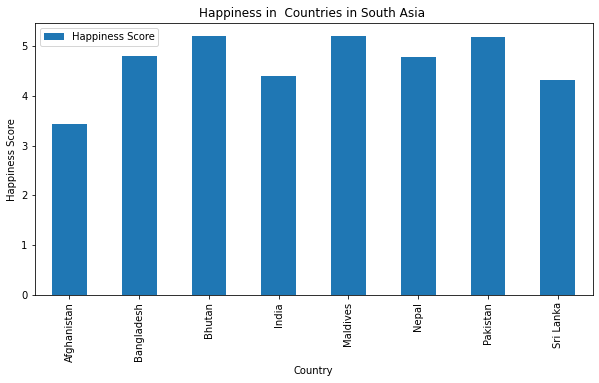

In [226]:
# Collapsing of data before creating graphs
collapsedhappy =happy.groupby(['country']).agg({'happy_score': 'mean'})

# Resetting the index so that the country does not become index and is ineligible for plotting grapgh
collapsedhappy = collapsedhappy.reset_index()

# Selecting the countries of South Asia to create the graph
selected_countries = ['Afghanistan', 'Nepal', 'Sri Lanka', 'India', 'Pakistan', 'Maldives', 'Bangladesh', 'Bhutan']
collapsedhappy = collapsedhappy[collapsedhappy['country'].isin(selected_countries)]

collapsedhappy  = collapsedhappy.set_index('country')

# Plotting the mean of each indicator for each country using a bar chart
collapsedhappy.plot(kind='bar', figsize=(10, 5), legend=True)

# Adding a title and labels for the x and y axes
plt.title('Happiness in  Countries in South Asia ')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

# Changing the legend labels
plt.legend(['Happiness Score'])

# Displaying the plot
plt.show()

On average, over the given time period in South Asia, Bhutan seems to be the happiest country followed by Maldives and Pakistan. The least happy country is Afghanistan, which makes sense in the light of countinued wars and control by religious fundamentalists.

**MERGE BETWEEN HAPPINESS DATASET AND MERGED DATASET THAT CONTAINS 'WORLD GOVERNANCE' AND 'REVENUE AS PERCENTAGE OF GDP'**

In [227]:
mergedhappy = pd.merge(happy, worldgivrev, how='outer',  on=['country', 'year', 'iso3code'], indicator=True)

mergedhappy.head()


,country,iso3code,year,happy_score,weocode,numcode,iso2code,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [228]:
unique_values = mergedhappy['year'].unique() # inspecting the number of years
# Print the unique values
unique_values

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2019, 2020, 2005, 2018, 2004, 2003, 1996, 1998, 2000, 2002,
       2021, 2001])

In [229]:
mergedhappy.sort_values(by=['country', 'year'], ascending=[False, True]) # exmining the merge status
mergedhappy.head()

,country,iso3code,year,happy_score,weocode,numcode,iso2code,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
4488,Zimbabwe,ZWE,1996,NaN,698.0,716.0,ZW,NaN,-0.611550,-0.466122,-0.318771,-0.765806,-0.814238,-0.278847,right_only
4489,Zimbabwe,ZWE,1998,NaN,698.0,716.0,ZW,NaN,-0.789812,-0.740443,-0.424851,-0.842345,-0.774310,-0.504802,right_only
4490,Zimbabwe,ZWE,2000,NaN,698.0,716.0,ZW,NaN,-1.085388,-1.318818,-0.757243,-1.391089,-1.381908,-1.127275,right_only
4491,Zimbabwe,ZWE,2002,NaN,698.0,716.0,ZW,NaN,-1.363361,-1.515870,-0.839923,-1.798834,-1.596318,-1.156760,right_only
4492,Zimbabwe,ZWE,2003,NaN,698.0,716.0,ZW,NaN,-1.431192,-1.087581,-0.926836,-1.855192,-1.607022,-1.188868,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,NaN,NaN,2021,NaN,967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4852,NaN,NaN,2021,NaN,351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4853,NaN,NaN,2021,NaN,968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
4854,NaN,NaN,2021,NaN,537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


,country,iso3code,year,happy_score,weocode,numcode,iso2code,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [230]:
unique_values = mergedhappy['_merge'].unique() #investigating merge

unique_values

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [231]:
unique_values = mergedhappy['country'].unique() # examining countries to see if names of countries are different

unique_values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazak

In [232]:
# Correction of Names of Countries by Replacing

mergedhappy = mergedhappy.replace({'country' : { 'Congo, Rep.': 'Congo', "Côte d'Ivoire": "Cote d'Ivoire", 'Czechia':'Czech Republic', 
                          
                                    'Syrian Arab Republic':'Syria', 'United States':  'United States Of America' }})

mergedhappy = mergedhappy.drop(mergedhappy.index[mergedhappy['country'].isin(['Hong Kong SAR, China', 'Macao SAR, China', 'Puerto Rico'])]) #dropping names that are not countries

#mergedhappy = mergedhappy.dropna(subset=['country' "iso3code"], inplace=True) # dropped a
mergedhappy =  mergedhappy[ mergedhappy.country.notnull()] # The missing values of countires were dropped.

mergedhappy.head()

,country,iso3code,year,happy_score,weocode,numcode,iso2code,totrevgdp,voacest,polstabest,goveffest,quaregest,ruloflawest,corcontest,_merge
0,Afghanistan,AFG,2006,3.723590,512.0,4.0,AF,18.945911,-1.110294,-2.219135,-1.465511,-1.689469,-1.879005,-1.446292,both
1,Afghanistan,AFG,2007,4.401778,512.0,4.0,AF,18.985790,-1.057654,-2.413373,-1.443468,-1.708872,-1.852560,-1.613251,both
2,Afghanistan,AFG,2008,4.758381,512.0,4.0,AF,17.035778,-1.168902,-2.691361,-1.533435,-1.607167,-1.903308,-1.672096,both
3,Afghanistan,AFG,2009,3.831719,512.0,4.0,AF,19.390545,-1.375495,-2.711421,-1.511002,-1.664508,-1.876119,-1.552299,both
4,Afghanistan,AFG,2010,3.782938,512.0,4.0,AF,21.722488,-1.404467,-2.579152,-1.480806,-1.516528,-1.870058,-1.645391,both


In [233]:
unique_values1 = mergedhappy['country'].unique() # reinvestigating countries to see of the name of a same country varies

unique_values1

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan',

In [234]:
mergedhappy.columns

Index(['country', 'iso3code', 'year', 'happy_score', 'weocode', 'numcode',
       'iso2code', 'totrevgdp', 'voacest', 'polstabest', 'goveffest',
       'quaregest', 'ruloflawest', 'corcontest', '_merge'],
      dtype='object')